### Import libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import squarify as sq

### Load Netflix data in .csv format:

In [5]:
df = pd.read_csv("/Users/thanujacherukuri/Desktop/Portfolio/ConjointAnalysisInPython/data/netflix_customer_survey.csv")
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


### Prepare Data for Data Processing:
#### Isolate independent/features(X) and dependent/target(y) variables:

In [6]:
y = df.selected
X = df.drop(columns=['selected', 'customerid'], axis = 1)
# print(X.head())
print(y.head())


0    1
1    1
2    1
3    1
4    1
Name: selected, dtype: int64


### Create dummy variables:

In [7]:
X_dummy = pd.get_dummies(X, columns= X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


#### Now apply logistic regression to the independent variables to do conjoint analysis:

1.   Built the regression model:
2.   The outcome of logistic regression contains coefficients.
3.   Higher the coefficient value the more relevant is that level.



In [8]:
model = sm.GLM(y, X_dummy, family = sm.families.Binomial()).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Tue, 23 Apr 2024   Deviance:                       3896.6
Time:                        07:11:43   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08370
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.6990      0.091     -7.697      0.000      -0.877      -0.521
NumberAccounts_2                -0.0680      0.089     -0.761      0.447      -0.243       0.107
NumberAccounts_3                -0.0230      0.088     -0.260      0.795      -0.196       0.150
NumberAccounts_4                 0.1238      0.084      1.474      0.141      -0.041       0.288
NumberAccounts_5                 0.1296      0.085      1.522      0.128      -0.037       0.296
NumberAccounts_6                 0.4937      0.083      5.960      0.000       0.331       0.656
price_8                          0.2918      0.086      3.388      0.001       0.123       0.461
price_10                         0.2195      0.087      2.514      0.012       0.048       0.391
price_12                         0.2045      0.083      2.471      0.013       0.042       0.367
price_15                         0.0191      0.085      0.226      0.821      -0.147       0.185
price_18                        -0.1038      0.087     -1.190      0.234      -0.275       0.067
price_20                        -0.6740      0.092     -7.308      0.000      -0.855      -0.493
ExtraContent_Disney              0.2265      0.088      2.584      0.010       0.055       0.398
ExtraContent_HBO                 0.2242      0.085      2.627      0.009       0.057       0.391
ExtraContent_Marvel              0.1437      0.084      1.705      0.088      -0.022       0.309
ExtraContent_Prime originals     0.1230      0.087      1.410      0.159      -0.048       0.294
ExtraContent_Soccer             -0.2060      0.085     -2.422      0.015      -0.373      -0.039
ExtraContent_less content       -0.5543      0.090     -6.132      0.000      -0.732      -0.377
ads_none                         0.2050      0.056      3.657      0.000       0.095       0.315
ads_one_per_day                  0.1118      0.057      1.970      0.049       0.001       0.223
ads_one_per_show                -0.3597      0.057     -6.276      0.000      -0.472      -0.247
================================================================================================
"""

### Conjoint Analysis:

In [9]:
# Create a dictionary dataframe with results of the model:

df_result = pd.DataFrame({'param_names': model.params.keys(),
                          'coefficient_values': model.params.values,
                          'pvalues': model.pvalues})
df_result

,param_names,coefficient_values,pvalues
NumberAccounts_1,NumberAccounts_1,-0.699014,1.389667e-14
NumberAccounts_2,NumberAccounts_2,-0.068035,4.469136e-01
NumberAccounts_3,NumberAccounts_3,-0.022994,7.945313e-01
NumberAccounts_4,NumberAccounts_4,0.123791,1.405992e-01
NumberAccounts_5,NumberAccounts_5,0.129607,1.279249e-01
NumberAccounts_6,NumberAccounts_6,0.493747,2.528595e-09
price_8,price_8,0.291790,7.051345e-04
price_10,price_10,0.219487,1.193461e-02
price_12,price_12,0.204541,1.346058e-02
price_15,price_15,0.019095,8.213115e-01


In [10]:
# Identifying the statistically significant variables:

df_result['is_important'] = (df_result['pvalues'] < 0.05)
df_result['color'] = ['blue' if item else 'red' for item in df_result['is_important']]
df_result.head()

,param_names,coefficient_values,pvalues,is_important,color
NumberAccounts_1,NumberAccounts_1,-0.699014,1.389667e-14,True,blue
NumberAccounts_2,NumberAccounts_2,-0.068035,4.469136e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.022994,7.945313e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.123791,1.405992e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.129607,1.279249e-01,False,red


In [11]:
# Sort Coefficients:
df_result = df_result.sort_values(by= 'coefficient_values', ascending = True)

<function matplotlib.pyplot.show(close=None, block=None)>

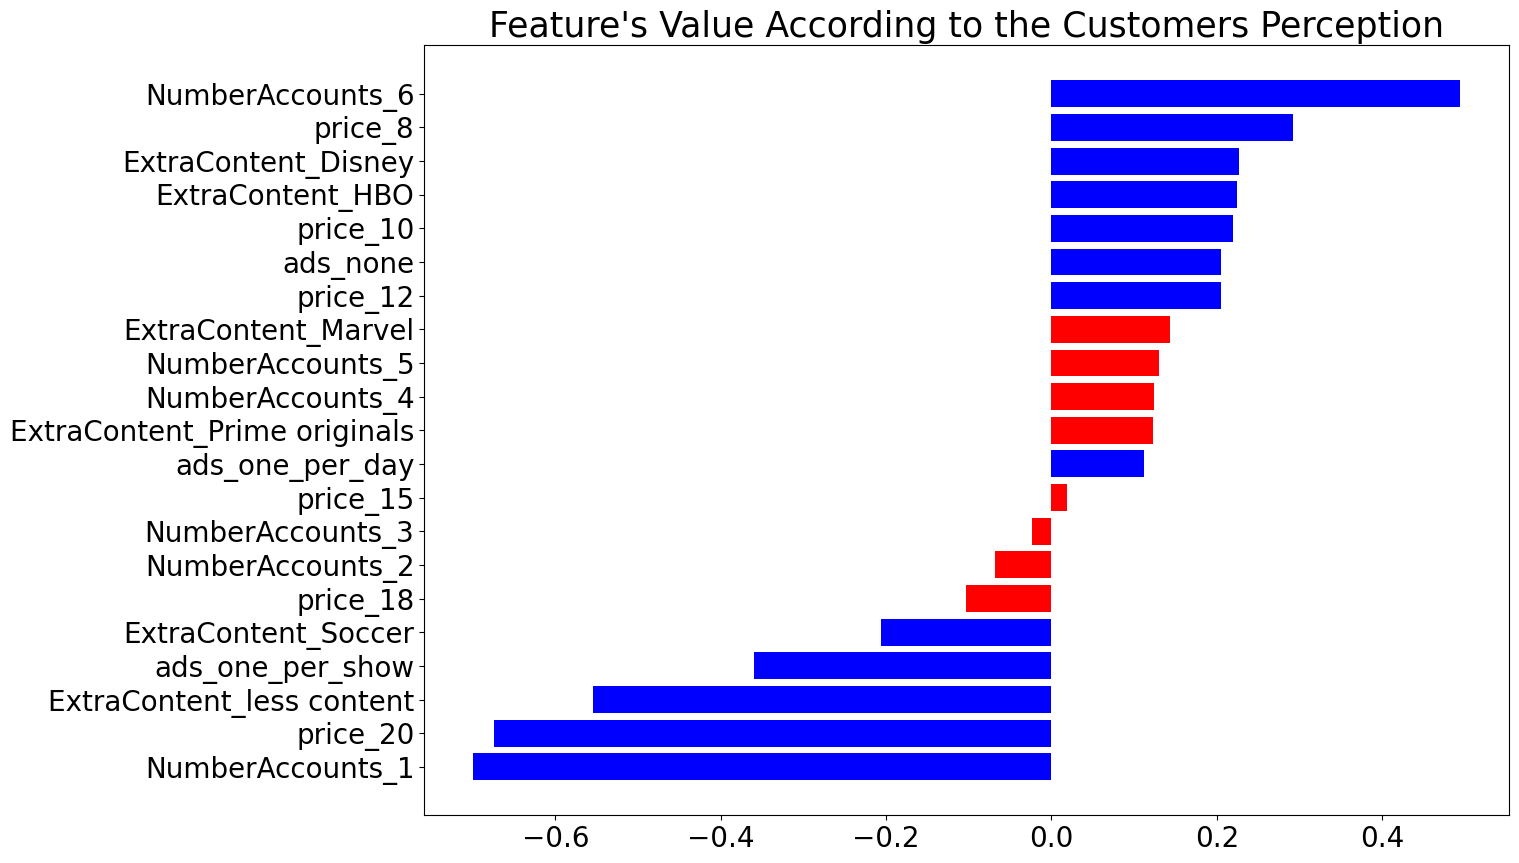

In [12]:
# Plot the coefficients:
f, ax = plt.subplots(figsize=(14,10))
values = df_result.coefficient_values
xbar = np.arange(len(values))
plt.title("Feature's Value According to the Customers Perception", fontsize=25)
# Bar plot:
plt.barh(xbar, values, color = df_result['color'])
# Customizing ticks:
plt.yticks(xbar, labels = df_result['param_names'], fontsize=20)
plt.xticks(fontsize=20)
plt.show

In [13]:
df_result.head()

,param_names,coefficient_values,pvalues,is_important,color
NumberAccounts_1,NumberAccounts_1,-0.699014,1.389667e-14,True,blue
price_20,price_20,-0.674003,2.718098e-13,True,blue
ExtraContent_less content,ExtraContent_less content,-0.554344,8.684394e-10,True,blue
ads_one_per_show,ads_one_per_show,-0.359708,3.475567e-10,True,blue
ExtraContent_Soccer,ExtraContent_Soccer,-0.206014,1.542298e-02,True,blue


In [14]:
print(len(df_result))

print(df_result.iloc[0, 0])
print(df_result.iloc[1, 0])
print(df_result.iloc[2, 0])
print(df_result.iloc[3, 0])

print(df_result.iloc[0, 1])
print(df_result.iloc[1, 1])
print(df_result.iloc[2, 1])
print(df_result.iloc[3, 1])

21
NumberAccounts_1
price_20
ExtraContent_less content
ads_one_per_show
-0.6990143682938972
-0.6740026324961886
-0.5543437258966765
-0.35970765638450675


In [15]:
# Isolate the feature group:
# First isolate 'price_x' feature with their coefficients:
feature = 'price'
attributes = []
coefficients = []
for i in range(len(df_result)):
  if df_result.iloc[i, 0].find(feature) == 0:
    attributes.append(df_result.iloc[i, 0])
    coefficients.append(df_result.iloc[i, 1])

In [16]:
attributes

['price_20', 'price_18', 'price_15', 'price_12', 'price_10', 'price_8']

In [17]:
coefficients

[-0.6740026324961886,
 -0.10380918534666317,
 0.01909513311194248,
 0.20454071347919817,
 0.21948694550992542,
 0.29179004289432714]

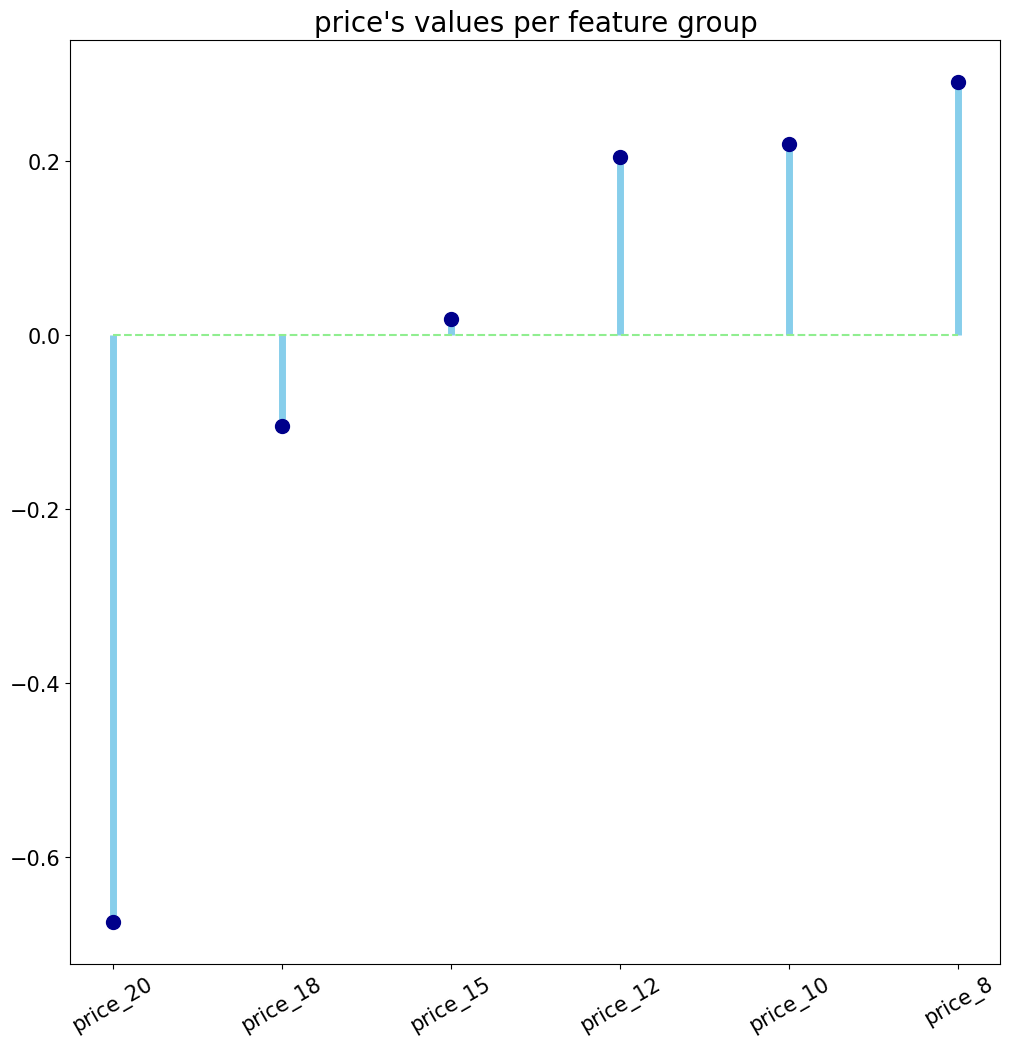

In [18]:
# Visualize obtained attributes and their coefficients in a lollipop chart:

# Visualizing price attribute:
f, ax = plt.subplots(figsize=(12, 12))
plt.title(f"{feature}'s values per feature group", fontsize=20)
# Lollipop plot:
(markers, stemlines, baseline)=plt.stem(attributes, coefficients, linefmt= '-', markerfmt= 'o', basefmt='--')

#Customize ticks:
plt.xticks(fontsize=15, rotation = 30)
plt.yticks(fontsize=15)
#Customize lollipop:
plt.setp(stemlines, color = 'skyblue', linewidth= 5)
plt.setp(markers, color = 'darkblue', markersize=10)
plt.setp(baseline, color= 'lightgreen')

#Show plot:
plt.show()

### Feature Importance:

In [19]:
features_partworth = {}
for key, coeff in model.params.items():
    split_key = key.split('_')
    feature = split_key[0]
    if feature not in features_partworth:
        features_partworth[feature] = list()
    features_partworth[feature].append(coeff)
features_partworth

{'NumberAccounts': [-0.6990143682938972,
  -0.0680351648314812,
  -0.022994497834270308,
  0.12379090301931961,
  0.1296070743061746,
  0.49374707078669666],
 'price': [0.29179004289432714,
  0.21948694550992542,
  0.20454071347919817,
  0.01909513311194248,
  -0.10380918534666317,
  -0.6740026324961886],
 'ExtraContent': [0.2265331038145762,
  0.2242107404118352,
  0.14370639917360073,
  0.12300876412944822,
  -0.2060142644802427,
  -0.5543437258966765],
 'ads': [0.20497159184626856, 0.11183708169077922, -0.35970765638450675]}

In [20]:
# Calculate: maximum of a feature(price_8)-minimum of a feature(price_20)
importance_per_feature = {k: max(v)-min(v) for k , v in features_partworth.items()}

In [21]:
# Computing sum of importance to later calculate relative importance:
total_importances = sum(importance_per_feature.values())
total_importances

3.5041101924131377

In [22]:
# Relative Importance(add upto 100)
relative_importance_per_feature = { k : round(v*100/total_importances,1) for k, v in importance_per_feature.items()}
relative_importance_per_feature

{'NumberAccounts': 34.0, 'price': 27.6, 'ExtraContent': 22.3, 'ads': 16.1}

In [23]:
#Build Dataframe to visualize as a Treemap:
df_importances = pd.DataFrame(list(relative_importance_per_feature.items()),
                              columns=['feature', 'relative_importance'])
df_importances

,feature,relative_importance
0,NumberAccounts,34.0
1,price,27.6
2,ExtraContent,22.3
3,ads,16.1


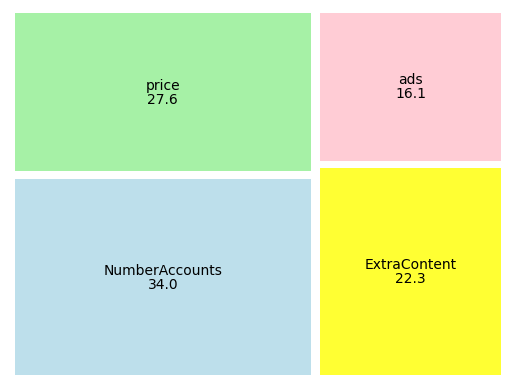

In [24]:
# Treemap:
sq.plot(sizes=df_importances.relative_importance,
        label= df_importances.feature,
        color=['lightblue','lightgreen','yellow','pink'],
        value= df_importances.relative_importance,
        alpha = 0.8,
        pad = 1
    )
plt.axis('off')
plt.show()

### Interaction Terms:
##### Try to find out whether a combination of features(ExtraContent+ads) is important to the customer or not.
##### Out of those which has highest importance?

In [25]:
df.head()
df.shape

(3000, 6)

In [26]:
# Create Interaction terms:
df['content_ads'] = df.ExtraContent + '_'+df.ads
df.head()
df.shape

(3000, 7)

In [27]:
# Remove the variables in the interaction term:
df_interaction = df.drop(columns=['ExtraContent', 'ads'])
print(df_interaction.shape)
df_interaction.head(5)

(3000, 5)


,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [28]:
#Isolate independent and dependent variables:
y = df_interaction.selected
X = df_interaction.drop(columns=['selected', 'customerid'], axis = 1)
print(X.head())
print(X.shape)
print(y.head())


   NumberAccounts  price          content_ads
0               2     10      HBO_one_per_day
1               6      8  Marvel_one_per_show
2               4     15   Disney_one_per_day
3               5     10      HBO_one_per_day
4               1     20  Soccer_one_per_show
(3000, 3)
0    1
1    1
2    1
3    1
4    1
Name: selected, dtype: int64


In [29]:
# Create dummy variables:
X_dummy = pd.get_dummies(X, columns= X.columns)
X_dummy.head()
# print(X_dummy.shape)

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [30]:
# Build regression model:
model_2 = sm.GLM(y,X_dummy,family=sm.families.Binomial()).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2972
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1941.8
Date:                Tue, 23 Apr 2024   Deviance:                       3883.6
Time:                        07:11:47   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08767
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
NumberAccounts_1                            -0.7176      0.092     -7.802      0.000      -0.898      -0.537
NumberAccounts_2                            -0.0685      0.091     -0.755      0.450      -0.246       0.109
NumberAccounts_3                            -0.0335      0.089     -0.375      0.708      -0.209       0.142
NumberAccounts_4                             0.1116      0.085      1.315      0.188      -0.055       0.278
NumberAccounts_5                             0.1214      0.086      1.414      0.157      -0.047       0.290
NumberAccounts_6                             0.4918      0.084      5.855      0.000       0.327       0.656
price_8                                      0.2909      0.087      3.361      0.001       0.121       0.460
price_10                                     0.2111      0.089      2.378      0.017       0.037       0.385
price_12                                     0.2005      0.084      2.397      0.017       0.037       0.364
price_15                                     0.0088      0.086      0.103      0.918      -0.159       0.177
price_18                                    -0.1126      0.089     -1.269      0.204      -0.286       0.061
price_20                                    -0.6934      0.093     -7.456      0.000      -0.876      -0.511
content_ads_Disney_none                      0.3344      0.154      2.177      0.029       0.033       0.635
content_ads_Disney_one_per_day               0.5472      0.174      3.137      0.002       0.205       0.889
content_ads_Disney_one_per_show             -0.1552      0.159     -0.975      0.329      -0.467       0.157
content_ads_HBO_none                         0.5285      0.159      3.320      0.001       0.216       0.840
content_ads_HBO_one_per_day                  0.5093      0.155      3.287      0.001       0.206       0.813
content_ads_HBO_one_per_show                -0.3537      0.158     -2.244      0.025      -0.663      -0.045
content_ads_Marvel_none                      0.2573      0.153      1.684      0.092      -0.042       0.557
content_ads_Marvel_one_per_day               0.2300      0.158      1.456      0.145      -0.080       0.540
content_ads_Marvel_one_per_show             -0.0541      0.151     -0.359      0.720      -0.350       0.241
content_ads_Prime originals_none             0.2566      0.158      1.622      0.105      -0.053       0.567
content_ads_Prime originals_one_per_day      0.1289      0.155      0.831      0.406      -0.175       0.433
content_ads_Prime originals_one_per_show     0.0194      0.162      0.120      0.905      -0.299       0.337
content_ads_Soccer_none                      0.1458      0.154      0.946      0.344      -0.156       0.448
content_ads_Soccer_one_per_day 

### Interaction terms results visualization:

In [31]:
# Create a dictionary dataframe with results of the model:

df_result_interaction = pd.DataFrame({'param_names': model_2.params.keys(),
                          'coefficient_values': model_2.params.values,
                          'pvalues': model_2.pvalues}).sort_values(by='coefficient_values')
df_result_interaction

,param_names,coefficient_values,pvalues
content_ads_less content_one_per_show,content_ads_less content_one_per_show,-1.090064,7.451868e-10
NumberAccounts_1,NumberAccounts_1,-0.717598,6.107286e-15
price_20,price_20,-0.693413,8.940677e-14
content_ads_Soccer_one_per_show,content_ads_Soccer_one_per_show,-0.505787,1.828335e-03
content_ads_less content_one_per_day,content_ads_less content_one_per_day,-0.423118,8.958911e-03
content_ads_HBO_one_per_show,content_ads_HBO_one_per_show,-0.353676,2.485649e-02
content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_day,-0.245145,1.145228e-01
content_ads_less content_none,content_ads_less content_none,-0.225057,1.382906e-01
content_ads_Disney_one_per_show,content_ads_Disney_one_per_show,-0.155159,3.293281e-01
price_18,price_18,-0.112595,2.043427e-01


In [32]:
# Isolate the interaction feature group:
# First isolate 'content_ads_x' feature with their coefficients:
feature = 'content_ads'
interaction_attributes = []
interaction_coefficients = []
for i in range(len(df_result_interaction)):
  if df_result_interaction.iloc[i, 0].find(feature) == 0:
    if df_result_interaction.iloc[i,0].find('none') == -1:
      interaction_attributes.append(df_result_interaction.iloc[i, 0])
      interaction_coefficients.append(df_result_interaction.iloc[i, 1])

In [33]:
interaction_attributes

['content_ads_less content_one_per_show',
 'content_ads_Soccer_one_per_show',
 'content_ads_less content_one_per_day',
 'content_ads_HBO_one_per_show',
 'content_ads_Soccer_one_per_day',
 'content_ads_Disney_one_per_show',
 'content_ads_Marvel_one_per_show',
 'content_ads_Prime originals_one_per_show',
 'content_ads_Prime originals_one_per_day',
 'content_ads_Marvel_one_per_day',
 'content_ads_HBO_one_per_day',
 'content_ads_Disney_one_per_day']

In [34]:
interaction_coefficients

[-1.0900642678190828,
 -0.5057874140407786,
 -0.4231176466727015,
 -0.3536755959670652,
 -0.24514470824589996,
 -0.1551591864714395,
 -0.05407114201578704,
 0.019425609694076792,
 0.12887603423308333,
 0.22997352838734533,
 0.509300716882295,
 0.5471754314442586]

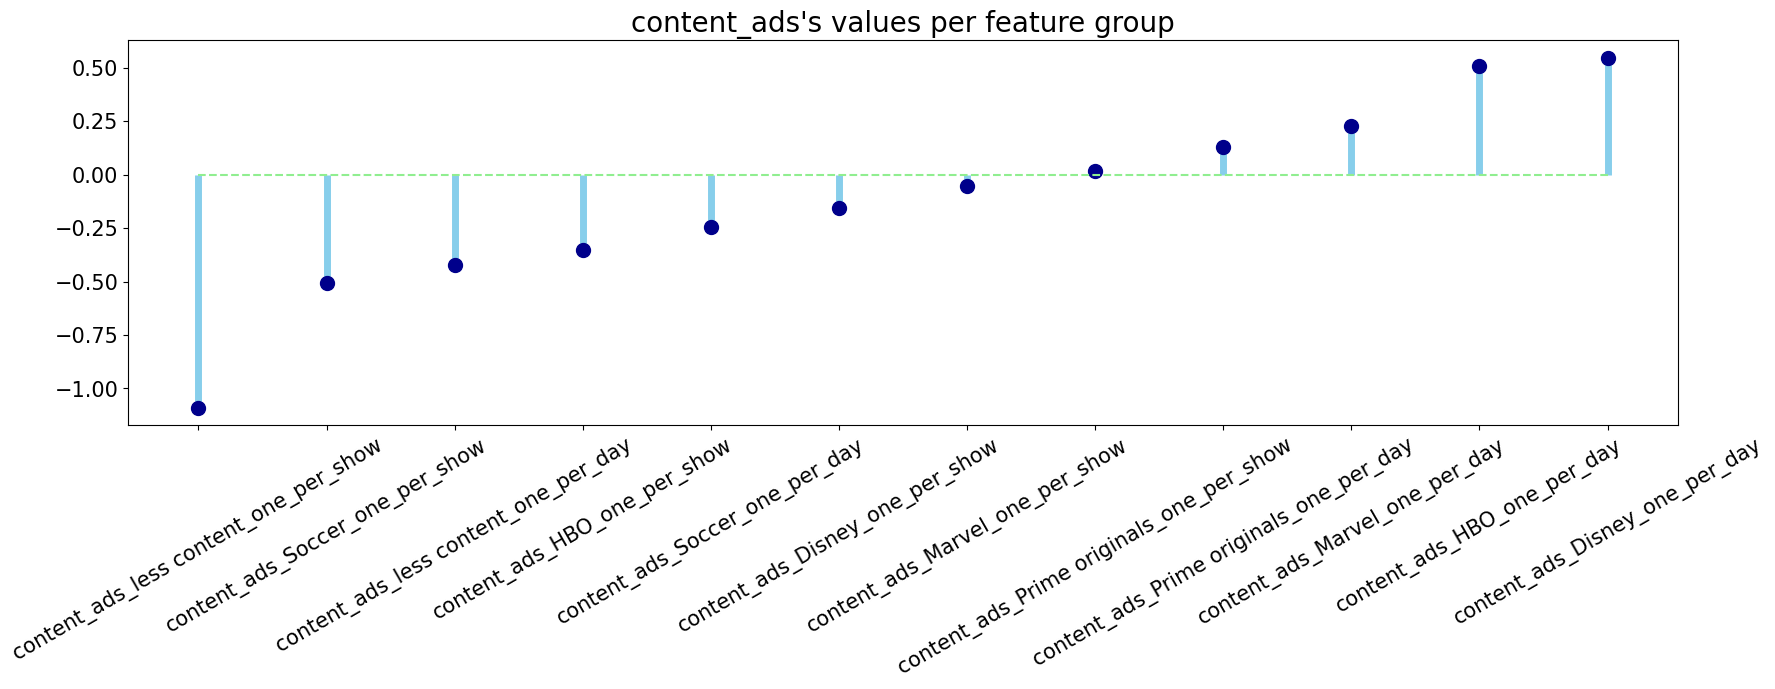

In [35]:
# Visualize obtained interaction attributes and their coefficients in a lollipop chart:

# Visualizing price attribute:
f, ax = plt.subplots(figsize=(20, 5))
plt.title(f"{feature}'s values per feature group", fontsize=20)
# Lollipop plot:
(markers, stemlines, baseline)=plt.stem(interaction_attributes, interaction_coefficients, linefmt= '-', markerfmt= 'o', basefmt='--')

#Customize ticks:
plt.xticks(fontsize=15, rotation = 30)
plt.yticks(fontsize=15)
#Customize lollipop:
plt.setp(stemlines, color = 'skyblue', linewidth= 5)
plt.setp(markers, color = 'darkblue', markersize=10)
plt.setp(baseline, color= 'lightgreen')

#Show plot:
plt.show()